# Cleaning Notebook

# Imports

In [244]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import folium


In [458]:
df = pd.read_csv('/Users/lidetalemu/Downloads/the-human-freedom-index/hfi_cc_2019.csv')

countries_regions_2010 = pd.read_csv('/Users/lidetalemu/Downloads/the-human-freedom-index/hfi_cc_2019.csv')[['countries', 'region']]



In [429]:
#DF FOR 2010

df_2010= df[['year', 'hf_score', 'pf_rol_procedural', 'pf_rol_civil', 'pf_rol_criminal',
             'pf_rol', 'pf_ss', 'pf_movement','pf_religion', 'pf_association',
            'pf_expression', 'pf_identity', 'ef_government', 'ef_legal', 'ef_money',
             'ef_trade', 'ef_trade_regulatory']]

df_2010 = df_2010.loc[df_2010['year'] ==  2010]
df_2010.head()


,year,hf_score,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss,pf_movement,pf_religion,pf_association,pf_expression,pf_identity,ef_government,ef_legal,ef_money,ef_trade,ef_trade_regulatory
1134,2010,7.71,5.7,5.1,4.1,4.9,9.4,10,9.4,-,7.6,8.8,7.8,5.3,9.7,7.2,6.9
1135,2010,5.26,-,-,-,4.4,8.4,5,4.4,4.4,6.7,1.3,3.7,3.8,7.2,5.8,5.9
1136,2010,5.44,-,-,-,3.8,8.4,3.3,6.8,2,7.4,5,5.7,3.7,5.6,6.2,4
1137,2010,6.96,6.3,5.4,4.3,5.3,8.8,10,9.1,9.1,8.5,10,6.5,4.2,6.6,6.1,5.3
1138,2010,7.41,-,-,-,4.8,9.6,6.7,7,-,6.8,8.8,8.2,5.6,9.2,7.6,6.6


In [249]:
missing_values1 = df_2010.loc[df_2010.pf_rol_procedural == '-']


df_2010 = df_2010.drop(index=missing_values1.index)


df_2010.head(2)

,year,hf_score,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss,pf_movement,pf_religion,pf_association,pf_expression,pf_identity,ef_government,ef_legal,ef_money,ef_trade,ef_trade_regulatory
1134,2010,7.71,5.7,5.1,4.1,4.9,9.4,10,9.4,-,7.6,8.8,7.8,5.3,9.7,7.2,6.9
1137,2010,6.96,6.3,5.4,4.3,5.3,8.8,10,9.1,9.1,8.5,10,6.5,4.2,6.6,6.1,5.3


In [431]:
missing_values2 = df_2010.loc[df_2010.pf_rol_civil == '-']


df_2010 = df_2010.drop(index=missing_values2.index)


df_2010.head(2)

,year,hf_score,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss,pf_movement,pf_religion,pf_association,pf_expression,pf_identity,ef_government,ef_legal,ef_money,ef_trade,ef_trade_regulatory
1134,2010,7.71,5.7,5.1,4.1,4.9,9.4,10,9.4,-,7.6,8.8,7.8,5.3,9.7,7.2,6.9
1137,2010,6.96,6.3,5.4,4.3,5.3,8.8,10,9.1,9.1,8.5,10,6.5,4.2,6.6,6.1,5.3


In [432]:
missing_values3 = df_2010.loc[df_2010.pf_rol_criminal == '-']


df_2010 = df_2010.drop(index=missing_values3.index)


df_2010.head(2)

,year,hf_score,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss,pf_movement,pf_religion,pf_association,pf_expression,pf_identity,ef_government,ef_legal,ef_money,ef_trade,ef_trade_regulatory
1134,2010,7.71,5.7,5.1,4.1,4.9,9.4,10,9.4,-,7.6,8.8,7.8,5.3,9.7,7.2,6.9
1137,2010,6.96,6.3,5.4,4.3,5.3,8.8,10,9.1,9.1,8.5,10,6.5,4.2,6.6,6.1,5.3


In [433]:

#Dropping rows with Null values
missing_values4 = df_2010.loc[df_2010.pf_association == '-']


df_2010 = df_2010.drop(index=missing_values4.index)


df_2010.head(2)

,year,hf_score,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss,pf_movement,pf_religion,pf_association,pf_expression,pf_identity,ef_government,ef_legal,ef_money,ef_trade,ef_trade_regulatory
1137,2010,6.96,6.3,5.4,4.3,5.3,8.8,10,9.1,9.1,8.5,10,6.5,4.2,6.6,6.1,5.3
1139,2010,8.69,8.8,7.2,7.2,7.8,9.8,10,9.2,10,9.4,10,7.2,8.1,9.5,7.5,8.3


In [434]:
df_2010 = df_2010.astype(float)
df_2010.dtypes

year                   float64
hf_score               float64
pf_rol_procedural      float64
pf_rol_civil           float64
pf_rol_criminal        float64
pf_rol                 float64
pf_ss                  float64
pf_movement            float64
pf_religion            float64
pf_association         float64
pf_expression          float64
pf_identity            float64
ef_government          float64
ef_legal               float64
ef_money               float64
ef_trade               float64
ef_trade_regulatory    float64
dtype: object

In [435]:
df_2010.drop('year', axis=1, inplace=True)

In [436]:
df_2010.head()

,hf_score,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss,pf_movement,pf_religion,pf_association,pf_expression,pf_identity,ef_government,ef_legal,ef_money,ef_trade,ef_trade_regulatory
1137,6.96,6.3,5.4,4.3,5.3,8.8,10.0,9.1,9.1,8.5,10.0,6.5,4.2,6.6,6.1,5.3
1139,8.69,8.8,7.2,7.2,7.8,9.8,10.0,9.2,10.0,9.4,10.0,7.2,8.1,9.5,7.5,8.3
1140,8.37,8.1,7.4,7.5,7.7,9.8,10.0,8.3,8.7,9.3,10.0,5.4,8.1,9.6,7.9,7.9
1144,5.91,3.4,3.2,3.8,3.5,8.1,6.7,5.8,6.1,8.4,0.0,8.4,3.3,6.5,6.0,5.7
1147,8.33,8.4,6.8,7.2,7.5,9.7,10.0,8.6,9.7,9.7,10.0,4.8,6.9,9.7,8.2,8.3


In [437]:
for col in df_2010:

    df_2010[col] = (df_2010[col] - df_2010[col].mean())/df_2010[col].std()  
    df_2010[col]

In [438]:
df_2010 = df_2010.drop('pf_rol', axis=1)

In [439]:
import statsmodels.api as sm

X = df_2010.drop(columns='hf_score').values

y = df_2010.hf_score

x_col = list(df_2010.drop(columns='hf_score').columns)
# Fitting the actual model

X = sm.add_constant(X)
model = sm.OLS(y, X, hasconst=True )

result = model.fit()

labels = ['intercept'] + x_col

result.summary(xname=labels)



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               hf_score   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     588.3
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           6.60e-66
Time:                        22:38:36   Log-Likelihood:                 82.516
No. Observations:                  84   AIC:                            -135.0
Df Residuals:                      69   BIC:                            -98.57
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
intercept            1.757e-15      0.011   1.61e-13      1.000      -0.022       0.022
pf_rol_procedural       0.0290      0.037      0.776      0.441      -0.046       0.104
pf_rol_civil           -0.0278      0.027     -1.025      0.309      -0.082       0.026
pf_rol_criminal         0.0497      0.035      1.425      0.159      -0.020       0.119
pf_ss                   0.1807      0.017     10.936      0.000       0.148       0.214
pf_movement             0.1266      0.018      7.003      0.000       0.091       0.163
pf_religion             0.0812      0.017      4.705      0.000       0.047       0.116
pf_association          0.0635      0.031      2.073      0.042       0.002       0.125
pf_expression           0.1182      0.024      4.882      0.000       0.070       0.166
pf_identity             0.1532      0.017      8.967      0.000       0.119       0.187
ef_government           0.1131      0.014      8.127      0.000       0.085       0.141
ef_legal                0.3024      0.023     13.061      0.000       0.256       0.349
ef_money                0.1414      0.019      7.357      0.000       0.103       0.180
ef_trade                0.1705      0.026      6.542      0.000       0.118       0.222
ef_trade_regulatory     0.0248      0.025      0.979      0.331      -0.026       0.075
==============================================================================
Omnibus:                        0.465   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.793   Jarque-Bera (JB):                0.169
Skew:                          -0.094   Prob(JB):                        0.919
Kurtosis:                       3.115   Cond. No.                         12.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [440]:
#2017 DATA 

#Selecting rows for regression analysis from the dataset

df_2017 = df[['year', 'countries', 'region', 'hf_score', 'pf_rol', 'pf_ss', 'pf_movement','pf_religion', 'pf_association',
        'pf_expression', 'pf_identity', 'ef_government', 'ef_legal', 'ef_money', 'ef_trade', 'ef_trade_regulatory']]

#selecting 2017 only data

df_2017 = df.loc[df_2017['year'] ==  2017]

#Dropping rows with Null values

missing_values = df_2017.loc[df_2017.pf_association == '-']
df_2017 = df_2017.drop(index=missing_values.index)

df_2017.head(2)


,year,ISO_code,countries,region,hf_score,hf_rank,hf_quartile,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,...,ef_regulation_business_adm,ef_regulation_business_bureaucracy,ef_regulation_business_start,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank
0,2017,ALB,Albania,Eastern Europe,7.84,38,1,6.7,4.5,4.7,...,6.3,6.7,9.7,4.1,6,7.2,6.7,7.8,7.67,30
1,2017,DZA,Algeria,Middle East & North Africa,4.99,155,4,-,-,-,...,3.7,1.8,9.3,3.8,8.7,7,5.7,5.4,4.77,159


In [441]:
countries = df_2017['countries']
df_2017 = df_2017.drop(columns=['countries'], axis=1)

df_2017.head()

,year,ISO_code,region,hf_score,hf_rank,hf_quartile,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,...,ef_regulation_business_adm,ef_regulation_business_bureaucracy,ef_regulation_business_start,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank
0,2017,ALB,Eastern Europe,7.84,38,1,6.7,4.5,4.7,5.3,...,6.3,6.7,9.7,4.1,6,7.2,6.7,7.8,7.67,30
1,2017,DZA,Middle East & North Africa,4.99,155,4,-,-,-,3.8,...,3.7,1.8,9.3,3.8,8.7,7,5.7,5.4,4.77,159
2,2017,AGO,Sub-Saharan Africa,5.4,151,4,-,-,-,3.4,...,2.4,1.3,8.7,1.9,8.1,6.8,4.9,5.7,4.83,158
3,2017,ARG,Latin America & the Caribbean,6.86,77,2,7.1,5.8,4.3,5.7,...,2.5,7.1,9.6,3.3,5.4,6.5,5.7,5.6,5.67,147
4,2017,ARM,Caucasus & Central Asia,7.42,54,2,-,-,-,4.9,...,4.6,6.2,9.9,4.6,9.3,7.1,6.9,7.5,7.7,27


In [444]:
#dropping columns not necessary for regression analysis.


In [443]:
df.head(2)

,ISO_code,countries,region,hf_score,hf_rank,hf_quartile,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,...,ef_regulation_business_adm,ef_regulation_business_bureaucracy,ef_regulation_business_start,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank
0,ALB,Albania,Eastern Europe,7.84,38,1,6.7,4.5,4.7,5.3,...,6.3,6.7,9.7,4.1,6,7.2,6.7,7.8,7.67,30
1,DZA,Algeria,Middle East & North Africa,4.99,155,4,-,-,-,3.8,...,3.7,1.8,9.3,3.8,8.7,7,5.7,5.4,4.77,159


# Using Stats Model

In [449]:
#target = df['hf_score']
#dependent = df.drop(columns=['hf_score'], axis=1)

#dependent.head()

In [450]:
#X_religion = df.pf_religion.values
#y = df.hf_score
#X_religion = sm.add_constant(df.pf_religion)
#model = sm.OLS(y, X_religion, hasconst=True)
#result = model.fit()
#result.summary() 

In [ ]:
#STANDARDIZATION 
#for col in df:
    #df[col] = (df[col] - df[col].mean())/df[col].std()  
#df.head(2)

In [451]:
#Using all the independent variables

#X = df.drop(columns='hf_score').values

#y = df.hf_score

# Fitting the actual model

#X = sm.add_constant(X)
#model = sm.OLS(y, X, hasconst=True )


#result = model.fit()


#result.summary()

In [452]:
#corr = df.corr()

# plot the heatmap
#sns.heatmap(corr, 
        #xticklabels=corr.columns,
       # yticklabels=corr.columns)

#plt.show()

In [453]:
#subset = ['pf_expression', 'pf_rol', 'ef_money', 'ef_legal']

#X = df[subset].values
#X = sm.add_constant(X)
#model = sm.OLS(y, X, hasconst=True, )
#result = model.fit()
#subset = ['intercept'] + subset
#print(subset)
#result.summary(xname = subset)

In [ ]:
#subset = [ 'pf_rol', 'ef_money', 'ef_legal']  # subsets can be different--> trying different models

#X = df[subset].values
#X = sm.add_constant(X)
#model = sm.OLS(y, X, hasconst=True, )
#result = model.fit()
#subset = ['intercept'] + subset
#print(subset)
#result.summary(xname = subset)

In [454]:
#Selecting target and independent variables

#y = df['hf_score']
#X = df.drop(columns=['hf_score'], axis=1)

#X.head()

# Grouping Dataframes by Polictical and Economic

### Grouping by Political

In [459]:
# Function gets columns with chosen year
def year(df, year):
    return df.loc[df["year"] == year]

In [464]:
personal = df[['year','hf_score','pf_ss_women_fgm',
'pf_ss_women_inheritance_widows',
'pf_ss_women_inheritance_daughters',
'pf_ss_women_inheritance',
'pf_ss_women',
'pf_movement_domestic',
'pf_movement_foreign',
'pf_movement_women',
'pf_religion_estop_establish',
'pf_religion_estop_operate',
'pf_religion_estop',
'pf_religion_harassment',
'pf_religion_restrictions',
'pf_association_association',
'pf_association_assembly',
'pf_association_political_establish',
'pf_association_political_operate',
'pf_association_political',
'pf_association_prof_establish',
'pf_association_prof_operate',
'pf_association_prof',
'pf_association_sport_establish',
'pf_association_sport_operate',
'pf_association_sport',
'pf_expression_killed',
'pf_expression_jailed',
'pf_expression_influence',
'pf_expression_control',
'pf_expression_cable',
'pf_expression_newspapers',
'pf_expression_internet',
'pf_identity_legal',
'pf_identity_sex_male',
'pf_identity_sex_female',
'pf_identity_sex',
'pf_identity_divorce']]

"""
This is the main dataframe
for personal Freedom categories
"""

'\nThis is the main dataframe\nfor personal Freedom categories\n'

In [465]:

personal_2017 = year(personal, 2017) # Retrieving political data from 2017

In [466]:

personal_2017 = personal_2017.drop(columns=["year"])
personal_2017.head(2)

,hf_score,pf_ss_women_fgm,pf_ss_women_inheritance_widows,pf_ss_women_inheritance_daughters,pf_ss_women_inheritance,pf_ss_women,pf_movement_domestic,pf_movement_foreign,pf_movement_women,pf_religion_estop_establish,...,pf_expression_influence,pf_expression_control,pf_expression_cable,pf_expression_newspapers,pf_expression_internet,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce
0,7.84,10,-,-,7.5,8.8,10,10,10,-,...,5,5.3,10,10,10,0,10,10,10,7.5
1,4.99,10,-,-,0,5,10,5,2.5,-,...,2.7,4,10,7.5,7.5,-,0,0,0,0


In [467]:
def drop_feature(df, features):
    return df.drop(columns=features)

In [468]:
personal_2017 = drop_feature(personal_2017, ['pf_ss_women_inheritance_widows', 'pf_ss_women_inheritance_daughters',
                                       'pf_religion_estop_establish', 'pf_religion_estop_operate', 
                                             'pf_expression_cable'])
personal_2017.head(2)

,hf_score,pf_ss_women_fgm,pf_ss_women_inheritance,pf_ss_women,pf_movement_domestic,pf_movement_foreign,pf_movement_women,pf_religion_estop,pf_religion_harassment,pf_religion_restrictions,...,pf_expression_jailed,pf_expression_influence,pf_expression_control,pf_expression_newspapers,pf_expression_internet,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce
0,7.84,10,7.5,8.8,10,10,10,10,9.6,8,...,10,5,5.3,10,10,0,10,10,10,7.5
1,4.99,10,0,5,10,5,2.5,5,6.9,3,...,9.5,2.7,4,7.5,7.5,-,0,0,0,0


In [469]:
def replace_with_na(df):
    for strings in df.values:
        df.replace('-', np.NaN, regex=True, inplace=True)

In [495]:
replace_with_na(personal_2017)
personal_2017

,hf_score,pf_ss_women_fgm,pf_ss_women_inheritance,pf_ss_women,pf_movement_domestic,pf_movement_foreign,pf_movement_women,pf_religion_estop,pf_religion_harassment,pf_religion_restrictions,...,pf_expression_jailed,pf_expression_influence,pf_expression_control,pf_expression_newspapers,pf_expression_internet,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce
0,0.480476,0.144806,-0.225377,-0.181192,0.418926,0.585764,0.29698,0.801857,1.358046,0.837386,...,0.208983,-0.254143,-0.103995,0.485522,0.625695,-1.857593,0.419653,0.258563,0.395893,-0.080422
2,-1.987939,0.144806,-1.117086,-1.081821,-1.169502,-1.133736,0.29698,0.801857,0.607764,0.546316,...,0.208983,-1.123295,-1.292237,-2.113447,-0.797761,0.941098,-2.409119,-4.019483,-3.396341,-0.893583
3,-0.510937,0.144806,0.666332,0.650159,0.418926,0.585764,0.29698,-0.098995,0.714947,0.197032,...,0.208983,0.010382,-0.019120,0.485522,0.625695,0.941098,0.419653,0.258563,0.395893,0.732738
4,0.055585,0.144806,-0.225377,-0.181192,0.418926,-1.133736,0.29698,-0.999846,0.286214,-0.850820,...,0.208983,-0.896559,-0.528367,-0.813963,-0.797761,0.101491,0.419653,0.258563,0.395893,-0.080422
5,1.269559,0.144806,0.666332,0.650159,0.418926,0.585764,0.29698,0.801857,-0.035335,1.361312,...,0.208983,0.879533,0.956936,0.485522,0.625695,0.101491,0.419653,0.258563,0.395893,0.732738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,1.117813,0.144806,-0.225377,-0.181192,0.418926,0.585764,0.29698,0.801857,-0.785617,-0.792606,...,0.208983,0.501641,0.956936,0.485522,0.625695,0.101491,0.419653,0.258563,0.395893,0.732738
155,1.107696,0.144806,0.666332,0.650159,0.418926,0.585764,0.29698,0.801857,-0.464068,1.244884,...,0.208983,0.879533,0.617438,0.485522,0.625695,0.101491,0.419653,0.258563,0.395893,0.732738
156,0.379311,0.144806,0.666332,0.650159,0.418926,0.585764,0.29698,-0.098995,0.714947,1.361312,...,0.208983,0.879533,0.829624,0.485522,0.625695,0.941098,0.419653,0.258563,0.395893,0.732738
157,-3.606572,0.144806,0.666332,0.650159,-2.757931,0.585764,0.29698,-0.999846,0.714947,0.022390,...,-0.000768,-1.652344,-1.377111,-3.412932,-2.221216,-1.857593,0.419653,0.258563,0.395893,-1.706744


In [417]:
personal_2017.isna().sum()

hf_score                                0
pf_ss_women_fgm                         0
pf_ss_women_inheritance                 2
pf_ss_women                             0
pf_movement_domestic                    1
pf_movement_foreign                     1
pf_movement_women                       1
pf_religion_estop                      26
pf_religion_harassment                  2
pf_religion_restrictions                2
pf_association_association             26
pf_association_assembly                26
pf_association_political_establish    162
pf_association_political_operate      162
pf_association_political               26
pf_association_prof_establish         162
pf_association_prof_operate           162
pf_association_prof                    26
pf_association_sport_establish        162
pf_association_sport_operate          162
pf_association_sport                   26
pf_expression_killed                    0
pf_expression_jailed                    0
pf_expression_influence           

In [473]:
personal_2017.drop(columns=['pf_association_political_establish',
                           'pf_association_political_establish',
                           'pf_association_political_operate',
                           'pf_association_prof_establish',
                           'pf_association_prof_operate',
                           'pf_association_sport_establish',
                           'pf_association_sport_operate'], inplace=True)
# personal_2017.pf_association_prof_operate.drop(inplace=True)
# personal_2017.pf_association_prof_establish.drop(inplace=True)
# personal_2017.pf_association_prof_operate.drop(inplace=True)
# personal_2017.pf_association_sport_establish.drop(inplace=True)
# personal_2017.pf_association_sport_operate.drop(inplace=True)

In [474]:
personal_2017.head(2)

,hf_score,pf_ss_women_fgm,pf_ss_women_inheritance,pf_ss_women,pf_movement_domestic,pf_movement_foreign,pf_movement_women,pf_religion_estop,pf_religion_harassment,pf_religion_restrictions,...,pf_expression_jailed,pf_expression_influence,pf_expression_control,pf_expression_newspapers,pf_expression_internet,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce
0,7.84,10,7.5,8.8,10,10,10,10,9.6,8,...,10,5,5.3,10,10,0,10,10,10,7.5
1,4.99,10,0,5,10,5,2.5,5,6.9,3,...,9.5,2.7,4,7.5,7.5,NaN,0,0,0,0


In [475]:
personal_2017.isna().sum()

hf_score                       0
pf_ss_women_fgm                0
pf_ss_women_inheritance        2
pf_ss_women                    0
pf_movement_domestic           1
pf_movement_foreign            1
pf_movement_women              1
pf_religion_estop             26
pf_religion_harassment         2
pf_religion_restrictions       2
pf_association_association    26
pf_association_assembly       26
pf_association_political      26
pf_association_prof           26
pf_association_sport          26
pf_expression_killed           0
pf_expression_jailed           0
pf_expression_influence        0
pf_expression_control          0
pf_expression_newspapers      28
pf_expression_internet        26
pf_identity_legal             59
pf_identity_sex_male           0
pf_identity_sex_female         0
pf_identity_sex                0
pf_identity_divorce            1
dtype: int64

In [476]:
personal_2017.dropna(inplace=True)
personal_2017.head()

,hf_score,pf_ss_women_fgm,pf_ss_women_inheritance,pf_ss_women,pf_movement_domestic,pf_movement_foreign,pf_movement_women,pf_religion_estop,pf_religion_harassment,pf_religion_restrictions,...,pf_expression_jailed,pf_expression_influence,pf_expression_control,pf_expression_newspapers,pf_expression_internet,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce
0,7.84,10,7.5,8.8,10,10,10,10,9.6,8,...,10,5,5.3,10,10,0,10,10,10,7.5
2,5.4,10,5,7.5,5,5,10,10,8.9,7.5,...,10,2.7,2.5,5,7.5,10,0,0,0,5
3,6.86,10,10,10,10,10,10,7.5,9,6.9,...,10,5.7,5.5,10,10,10,10,10,10,10
4,7.42,10,7.5,8.8,10,5,10,5,8.6,5.1,...,10,3.3,4.3,7.5,7.5,7,10,10,10,7.5
5,8.62,10,10,10,10,10,10,10,8.3,8.9,...,10,8,7.8,10,10,7,10,10,10,10


In [477]:
personal_2017 = personal_2017.astype(float)

personal_2017

,hf_score,pf_ss_women_fgm,pf_ss_women_inheritance,pf_ss_women,pf_movement_domestic,pf_movement_foreign,pf_movement_women,pf_religion_estop,pf_religion_harassment,pf_religion_restrictions,...,pf_expression_jailed,pf_expression_influence,pf_expression_control,pf_expression_newspapers,pf_expression_internet,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce
0,7.84,10.0,7.5,8.8,10.0,10.0,10.0,10.0,9.6,8.0,...,10.0,5.0,5.3,10.0,10.0,0.0,10.0,10.0,10.0,7.5
2,5.40,10.0,5.0,7.5,5.0,5.0,10.0,10.0,8.9,7.5,...,10.0,2.7,2.5,5.0,7.5,10.0,0.0,0.0,0.0,5.0
3,6.86,10.0,10.0,10.0,10.0,10.0,10.0,7.5,9.0,6.9,...,10.0,5.7,5.5,10.0,10.0,10.0,10.0,10.0,10.0,10.0
4,7.42,10.0,7.5,8.8,10.0,5.0,10.0,5.0,8.6,5.1,...,10.0,3.3,4.3,7.5,7.5,7.0,10.0,10.0,10.0,7.5
5,8.62,10.0,10.0,10.0,10.0,10.0,10.0,10.0,8.3,8.9,...,10.0,8.0,7.8,10.0,10.0,7.0,10.0,10.0,10.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,8.47,10.0,7.5,8.8,10.0,10.0,10.0,10.0,7.6,5.2,...,10.0,7.0,7.8,10.0,10.0,7.0,10.0,10.0,10.0,10.0
155,8.46,10.0,10.0,10.0,10.0,10.0,10.0,10.0,7.9,8.7,...,10.0,8.0,7.0,10.0,10.0,7.0,10.0,10.0,10.0,10.0
156,7.74,10.0,10.0,10.0,10.0,10.0,10.0,7.5,9.0,8.9,...,10.0,8.0,7.5,10.0,10.0,10.0,10.0,10.0,10.0,10.0
157,3.80,10.0,10.0,10.0,0.0,10.0,10.0,5.0,9.0,6.6,...,9.7,1.3,2.3,2.5,5.0,0.0,10.0,10.0,10.0,2.5


In [479]:
for col in personal_2017:

    personal_2017[col] = (personal_2017[col] - personal_2017[col].mean())/personal_2017[col].std()  
    personal_2017[col]
personal_2017.head()

,hf_score,pf_ss_women_fgm,pf_ss_women_inheritance,pf_ss_women,pf_movement_domestic,pf_movement_foreign,pf_movement_women,pf_religion_estop,pf_religion_harassment,pf_religion_restrictions,...,pf_expression_jailed,pf_expression_influence,pf_expression_control,pf_expression_newspapers,pf_expression_internet,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce
0,0.480476,0.144806,-0.225377,-0.181192,0.418926,0.585764,0.29698,0.801857,1.358046,0.837386,...,0.208983,-0.254143,-0.103995,0.485522,0.625695,-1.857593,0.419653,0.258563,0.395893,-0.080422
2,-1.987939,0.144806,-1.117086,-1.081821,-1.169502,-1.133736,0.29698,0.801857,0.607764,0.546316,...,0.208983,-1.123295,-1.292237,-2.113447,-0.797761,0.941098,-2.409119,-4.019483,-3.396341,-0.893583
3,-0.510937,0.144806,0.666332,0.650159,0.418926,0.585764,0.29698,-0.098995,0.714947,0.197032,...,0.208983,0.010382,-0.019120,0.485522,0.625695,0.941098,0.419653,0.258563,0.395893,0.732738
4,0.055585,0.144806,-0.225377,-0.181192,0.418926,-1.133736,0.29698,-0.999846,0.286214,-0.850820,...,0.208983,-0.896559,-0.528367,-0.813963,-0.797761,0.101491,0.419653,0.258563,0.395893,-0.080422
5,1.269559,0.144806,0.666332,0.650159,0.418926,0.585764,0.29698,0.801857,-0.035335,1.361312,...,0.208983,0.879533,0.956936,0.485522,0.625695,0.101491,0.419653,0.258563,0.395893,0.732738


# Running a Regression Model test using Stats Model

In [480]:
import statsmodels.api as sm

X = personal_2017.drop(columns='hf_score').values

y = personal_2017.hf_score

x_col = list(personal_2017.drop(columns='hf_score').columns)
# Fitting the actual model

X = sm.add_constant(X)
model = sm.OLS(y, X, hasconst=True )

result = model.fit()

labels = ['intercept'] + x_col

result.summary(xname=labels)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               hf_score   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     19.88
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           1.20e-21
Time:                        22:47:22   Log-Likelihood:                -32.718
No. Observations:                  91   AIC:                             115.4
Df Residuals:                      66   BIC:                             178.2
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
intercept                   8.327e-17      0.043   1.95e-15      1.000      -0.085       0.085
pf_ss_women_fgm               -0.2446      0.330     -0.741      0.461      -0.904       0.415
pf_ss_women_inheritance       -1.8710      3.498     -0.535      0.595      -8.854       5.113
pf_ss_women                    2.1499      3.627      0.593      0.555      -5.091       9.390
pf_movement_domestic           0.1687      0.060      2.831      0.006       0.050       0.288
pf_movement_foreign            0.0116      0.083      0.139      0.890      -0.155       0.178
pf_movement_women              0.0905      0.054      1.680      0.098      -0.017       0.198
pf_religion_estop             -0.1482      0.098     -1.519      0.133      -0.343       0.047
pf_religion_harassment        -0.0611      0.070     -0.872      0.386      -0.201       0.079
pf_religion_restrictions      -0.0135      0.072     -0.187      0.853      -0.158       0.131
pf_association_association    -0.1624      0.121     -1.340      0.185      -0.404       0.080
pf_association_assembly       -0.1815      0.103     -1.770      0.081      -0.386       0.023
pf_association_political       0.2580      0.107      2.412      0.019       0.044       0.472
pf_association_prof            0.0830      0.091      0.908      0.367      -0.099       0.265
pf_association_sport           0.0446      0.110      0.407      0.686      -0.174       0.263
pf_expression_killed          -0.0309      0.050     -0.612      0.543      -0.132       0.070
pf_expression_jailed          -0.0492      0.057     -0.862      0.392      -0.163       0.065
pf_expression_influence       -0.1567      0.151     -1.036      0.304      -0.459       0.145
pf_expression_control          0.7070      0.147      4.822      0.000       0.414       1.000
pf_expression_newspapers       0.2437      0.083      2.945      0.004       0.079       0.409
pf_expression_internet         0.0526      0.087      0.605      0.547      -0.121       0.226
pf_identity_legal              0.0511      0.058      0.885      0.379      -0.064       0.166
pf_identity_sex_male           0.0727      0.069      1.054      0.296      -0.065       0.210
pf_identity_sex_female        -0.0921      0.073     -1.262      0.212      -0.238       0.054
pf_identity_sex                0.0079      0.032      0.247      0.806      -0.056       0.072
pf_identity_divorce            0.0820      0.068      1.204      0.233      -0.054       0.218
==============================================================================
Omnibus:                        3.474   Durbin-Watson:                   1.765
Prob(Omnibus):                  0.176   Jarque-Bera (JB):                2.762
Skew:                           0.376   Prob(JB):                        0.251
Kurtosis:   

In [620]:
# Getting political columns from the main dataframe
political = df[['year',
'hf_score',
"pf_rol_procedural",
"pf_rol_civil",
"pf_rol_criminal",
"pf_ss_homicide",
"pf_ss_disappearances_disap",
"pf_ss_disappearances_violent",
"pf_ss_disappearances_organized",
"pf_ss_disappearances_fatalities",
"pf_ss_disappearances_injuries",
"pf_ss_disappearances"]]

"""
This is the main dataframe
for political categories
"""

'\nThis is the main dataframe\nfor political categories\n'

In [621]:
political_2010 = year(political, 2010) # Retrieving political data from 2010
political_2017 = year(political, 2017) # Retrieving political data from 2017

In [622]:
# Dropping the year column
political_2010 = political_2010.drop(columns=["year"])
political_2017 = political_2017.drop(columns=["year"])

In [618]:
political_2010.head(2)

,hf_score,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_ss_homicide,pf_ss_disappearances_disap,pf_ss_disappearances_violent,pf_ss_disappearances_organized,pf_ss_disappearances_fatalities,pf_ss_disappearances_injuries,pf_ss_disappearances
1134,7.71,5.7,5.1,4.1,8.3,10,10,10,10,10,10
1135,5.26,-,-,-,9.7,10,7.8,5,9,8.8,8.1


In [ ]:
def replace_with_na(df):
    for strings in df.values:
        df.replace('-', np.NaN, regex=True, inplace=True)

In [623]:
replace_with_na(political_2017)

In [628]:
political_2017.isna().sum()

hf_score                            0
pf_rol_procedural                  57
pf_rol_civil                       57
pf_rol_criminal                    57
pf_ss_homicide                      0
pf_ss_disappearances_disap          1
pf_ss_disappearances_violent        0
pf_ss_disappearances_organized     11
pf_ss_disappearances_fatalities     0
pf_ss_disappearances_injuries       0
pf_ss_disappearances                0
dtype: int64

In [629]:
political_2017.dropna(inplace=True)
political_2017.isna().sum()

hf_score                           0
pf_rol_procedural                  0
pf_rol_civil                       0
pf_rol_criminal                    0
pf_ss_homicide                     0
pf_ss_disappearances_disap         0
pf_ss_disappearances_violent       0
pf_ss_disappearances_organized     0
pf_ss_disappearances_fatalities    0
pf_ss_disappearances_injuries      0
pf_ss_disappearances               0
dtype: int64

In [631]:
political_2017 = political_2017.astype(float)

political_2017.head(2)

,hf_score,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_ss_homicide,pf_ss_disappearances_disap,pf_ss_disappearances_violent,pf_ss_disappearances_organized,pf_ss_disappearances_fatalities,pf_ss_disappearances_injuries,pf_ss_disappearances
0,7.84,6.7,4.5,4.7,9.1,10.0,10.0,10.0,10.0,10.0,10.0
3,6.86,7.1,5.8,4.3,8.0,5.0,10.0,7.5,10.0,10.0,8.5


In [632]:
for col in political_2017:

    political_2017[col] = (political_2017[col] - political_2017[col].mean())/political_2017[col].std()  
    political_2017[col]
political_2017.head()

,hf_score,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_ss_homicide,pf_ss_disappearances_disap,pf_ss_disappearances_violent,pf_ss_disappearances_organized,pf_ss_disappearances_fatalities,pf_ss_disappearances_injuries,pf_ss_disappearances
0,0.761465,0.721500,-0.731970,-0.093206,0.493559,0.533791,0.305697,1.107469,0.357277,0.440401,0.854766
3,-0.229552,0.894211,0.191876,-0.338485,0.112833,-1.188115,0.305697,0.144452,0.357277,0.440401,-0.397333
5,1.550234,1.455521,1.399982,1.562429,0.701227,0.533791,0.305697,1.107469,0.192633,-0.043556,0.854766
6,1.408660,1.714587,1.684243,1.746388,0.701227,0.533791,0.305697,1.107469,0.192633,0.440401,0.854766
10,-1.331805,-1.523742,-1.300491,-0.890364,0.493559,-2.910021,0.205796,-0.818564,0.192633,0.198422,-1.649432


In [633]:
#Model for political variables

import statsmodels.api as sm

X = political_2017.drop(columns='hf_score').values

y = political_2017.hf_score

x_col = list(political_2017.drop(columns='hf_score').columns)
# Fitting the actual model

X = sm.add_constant(X)
model = sm.OLS(y, X, hasconst=True )

result = model.fit()

labels = ['intercept'] + x_col

result.summary(xname=labels)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               hf_score   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     41.02
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           4.47e-29
Time:                        23:34:35   Log-Likelihood:                -55.176
No. Observations:                 100   AIC:                             132.4
Df Residuals:                      89   BIC:                             161.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
intercept                       -6.245e-16      0.045   -1.4e-14      1.000      -0.088       0.088
pf_rol_procedural                   0.6756      0.094      7.224      0.000       0.490       0.861
pf_rol_civil                        0.1406      0.129      1.093      0.277      -0.115       0.396
pf_rol_criminal                    -0.1364      0.151     -0.900      0.370      -0.437       0.165
pf_ss_homicide                      0.0982      0.056      1.744      0.085      -0.014       0.210
pf_ss_disappearances_disap         -1.1579      1.485     -0.780      0.438      -4.109       1.793
pf_ss_disappearances_violent       -0.5394      0.509     -1.060      0.292      -1.551       0.472
pf_ss_disappearances_organized     -0.9176      1.336     -0.687      0.494      -3.573       1.738
pf_ss_disappearances_fatalities    -0.0679      0.303     -0.224      0.823      -0.670       0.534
pf_ss_disappearances_injuries      -0.3181      0.248     -1.283      0.203      -0.811       0.175
pf_ss_disappearances                2.5815      3.069      0.841      0.403      -3.517       8.680
==============================================================================
Omnibus:                       27.945   Durbin-Watson:                   1.877
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               70.018
Skew:                          -0.980   Prob(JB):                     6.25e-16
Kurtosis:                       6.600   Cond. No.                         188.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Grouping by Economic

In [602]:
# Getting economic columns from the main dataframe
economic = df[["year",'hf_score',
"ef_government_consumption",
"ef_government_transfers",
"ef_government_enterprises",
"ef_government_tax_income",
"ef_government_tax_payroll",
'ef_government_tax',
"ef_government_soa",
"ef_legal_judicial",
"ef_legal_courts",
"ef_legal_protection",
"ef_legal_military",
"ef_legal_integrity",
"ef_legal_enforcement",
"ef_legal_restrictions",
"ef_legal_police",
"ef_legal_crime",
"ef_legal_gender",
"ef_money_growth",
"ef_money_inflation",
"ef_money_currency",             
"ef_trade_tariffs_revenue",
"ef_trade_tariffs",
"ef_trade_regulatory_nontariff",
"ef_trade_regulatory_compliance",
"ef_trade_black",
"ef_trade_movement_foreign",
"ef_trade_movement_capital",
"ef_trade_movement_visit",
"ef_trade_movement",
"ef_regulation_credit_ownership"]]

"""
This is the main dataframe
for economic categories
"""

'\nThis is the main dataframe\nfor economic categories\n'

In [603]:

economic_2017 = year(economic, 2017)  # Retrieving economic data from 2017

In [604]:
# Dropping the year column

economic_2017 = economic_2017.drop(columns=["year"])

In [605]:
economic_2017.reset_index()

,index,hf_score,ef_government_consumption,ef_government_transfers,ef_government_enterprises,ef_government_tax_income,ef_government_tax_payroll,ef_government_tax,ef_government_soa,ef_legal_judicial,...,ef_trade_tariffs_revenue,ef_trade_tariffs,ef_trade_regulatory_nontariff,ef_trade_regulatory_compliance,ef_trade_black,ef_trade_movement_foreign,ef_trade_movement_capital,ef_trade_movement_visit,ef_trade_movement,ef_regulation_credit_ownership
0,0,7.84,8.1,7.3,8,9,7,8,6.2,2.5,...,9.6,9,6,9.4,10,6.3,5.4,8.3,6.7,10
1,1,4.99,2.7,7.8,0,7,2,4.5,2.9,4.3,...,8.5,6.9,4.8,0.5,0,3.7,0,1.1,1.6,0
2,2,5.4,6.3,8.9,6,10,9,9.5,3.1,1.4,...,9.2,7.1,4.9,2.5,0,2.9,3.1,0.1,2,5
3,3,6.86,5.4,6.3,6,7,1,4,6.9,3.6,...,6.7,6.6,4.6,5.2,10,5.4,0.8,8,4.7,5
4,4,7.42,7.2,7.3,8,5,5,5,9.5,4,...,9,8.6,5.7,9,10,5.1,5.4,10,6.8,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,157,3.8,8.6,5.8,0,7,6,6.5,2,0.2,...,8.4,7.3,4.1,0,0,3.1,0,7.2,3.4,5
158,158,6.29,9.2,-,6,7,5,6,5.6,4.2,...,9.1,7.6,4.8,5.7,10,5.2,0.8,0.8,2.2,-
159,159,4.3,10,9,4,10,8,9,3.5,2.4,...,8.9,8.4,4,10,4.8,2.6,6.9,1,3.5,-
160,160,6.49,6.1,10,4,5,4,4.5,8.5,3.7,...,9,5.8,5.3,2.4,10,6.9,9.2,10,8.7,5


In [606]:
#Replacing '-' values in the data set to Null values 

def replace_with_na(df):
    for strings in df.values:
        df.replace('-', np.NaN, regex=True, inplace=True)
        
        
replace_with_na(economic_2017)
economic_2017.values

array([['7.84', '8.1', '7.3', ..., '8.3', '6.7', '10'],
       ['4.99', '2.7', '7.8', ..., '1.1', '1.6', '0'],
       ['5.4', '6.3', '8.9', ..., '0.1', '2', '5'],
       ...,
       ['4.3', '10', '9', ..., '1', '3.5', nan],
       ['6.49', '6.1', '10', ..., '10', '8.7', '5'],
       ['5.65', '5.5', '9.3', ..., '8.9', '4.1', '8']], dtype=object)

In [607]:
economic_2017.isna().sum()

hf_score                           0
ef_government_consumption          0
ef_government_transfers            9
ef_government_enterprises          0
ef_government_tax_income           0
ef_government_tax_payroll          4
ef_government_tax                  0
ef_government_soa                  4
ef_legal_judicial                  6
ef_legal_courts                    0
ef_legal_protection                5
ef_legal_military                  0
ef_legal_integrity                25
ef_legal_enforcement               1
ef_legal_restrictions              2
ef_legal_police                   14
ef_legal_crime                    10
ef_legal_gender                    0
ef_money_growth                    0
ef_money_inflation                 0
ef_money_currency                  0
ef_trade_tariffs_revenue          11
ef_trade_tariffs                   1
ef_trade_regulatory_nontariff      3
ef_trade_regulatory_compliance     2
ef_trade_black                     0
ef_trade_movement_foreign         10
e

In [608]:
economic_2017.dropna(inplace=True)
economic_2017.isna().sum()

hf_score                          0
ef_government_consumption         0
ef_government_transfers           0
ef_government_enterprises         0
ef_government_tax_income          0
ef_government_tax_payroll         0
ef_government_tax                 0
ef_government_soa                 0
ef_legal_judicial                 0
ef_legal_courts                   0
ef_legal_protection               0
ef_legal_military                 0
ef_legal_integrity                0
ef_legal_enforcement              0
ef_legal_restrictions             0
ef_legal_police                   0
ef_legal_crime                    0
ef_legal_gender                   0
ef_money_growth                   0
ef_money_inflation                0
ef_money_currency                 0
ef_trade_tariffs_revenue          0
ef_trade_tariffs                  0
ef_trade_regulatory_nontariff     0
ef_trade_regulatory_compliance    0
ef_trade_black                    0
ef_trade_movement_foreign         0
ef_trade_movement_capital   

In [609]:
economic_2017 = economic_2017.astype(float)

economic_2017

,hf_score,ef_government_consumption,ef_government_transfers,ef_government_enterprises,ef_government_tax_income,ef_government_tax_payroll,ef_government_tax,ef_government_soa,ef_legal_judicial,ef_legal_courts,...,ef_trade_tariffs_revenue,ef_trade_tariffs,ef_trade_regulatory_nontariff,ef_trade_regulatory_compliance,ef_trade_black,ef_trade_movement_foreign,ef_trade_movement_capital,ef_trade_movement_visit,ef_trade_movement,ef_regulation_credit_ownership
0,7.84,8.1,7.3,8.0,9.0,7.0,8.0,6.2,2.5,3.1,...,9.6,9.0,6.0,9.4,10.0,6.3,5.4,8.3,6.7,10.0
1,4.99,2.7,7.8,0.0,7.0,2.0,4.5,2.9,4.3,4.3,...,8.5,6.9,4.8,0.5,0.0,3.7,0.0,1.1,1.6,0.0
2,5.40,6.3,8.9,6.0,10.0,9.0,9.5,3.1,1.4,1.7,...,9.2,7.1,4.9,2.5,0.0,2.9,3.1,0.1,2.0,5.0
3,6.86,5.4,6.3,6.0,7.0,1.0,4.0,6.9,3.6,3.0,...,6.7,6.6,4.6,5.2,10.0,5.4,0.8,8.0,4.7,5.0
4,7.42,7.2,7.3,8.0,5.0,5.0,5.0,9.5,4.0,4.2,...,9.0,8.6,5.7,9.0,10.0,5.1,5.4,10.0,6.8,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,8.46,6.8,6.0,8.0,5.0,5.0,5.0,10.0,7.7,7.6,...,9.5,8.4,7.0,9.8,10.0,7.2,3.8,0.6,3.9,10.0
156,7.74,6.6,5.9,7.0,7.0,6.0,6.5,5.6,7.5,4.4,...,8.4,7.7,5.7,6.2,10.0,7.0,8.5,7.7,7.7,5.0
157,3.80,8.6,5.8,0.0,7.0,6.0,6.5,2.0,0.2,0.6,...,8.4,7.3,4.1,0.0,0.0,3.1,0.0,7.2,3.4,5.0
160,6.49,6.1,10.0,4.0,5.0,4.0,4.5,8.5,3.7,3.7,...,9.0,5.8,5.3,2.4,10.0,6.9,9.2,10.0,8.7,5.0


In [610]:
for col in economic_2017:

    economic_2017[col] = (economic_2017[col] - economic_2017[col].mean())/economic_2017[col].std()  
    economic_2017[col]
economic_2017.head()

,hf_score,ef_government_consumption,ef_government_transfers,ef_government_enterprises,ef_government_tax_income,ef_government_tax_payroll,ef_government_tax,ef_government_soa,ef_legal_judicial,ef_legal_courts,...,ef_trade_tariffs_revenue,ef_trade_tariffs,ef_trade_regulatory_nontariff,ef_trade_regulatory_compliance,ef_trade_black,ef_trade_movement_foreign,ef_trade_movement_capital,ef_trade_movement_visit,ef_trade_movement,ef_regulation_credit_ownership
0,0.687270,1.221916,-0.042238,0.438936,0.796453,0.728546,0.834366,-0.185748,-1.200640,-0.794865,...,0.703389,1.254025,0.266100,0.858305,0.218694,0.184030,0.602354,0.476633,0.643371,0.868490
1,-2.004063,-1.309877,0.201279,-2.260371,-0.081588,-1.151036,-0.722199,-1.846794,-0.382241,-0.049988,...,0.033418,-0.655989,-0.982452,-2.154600,-5.528382,-1.903537,-1.380152,-1.912699,-2.260110,-2.891639
2,-1.616889,0.377985,0.737017,-0.235891,1.235473,1.480378,1.501464,-1.746125,-1.700772,-1.663889,...,0.459763,-0.474083,-0.878406,-1.477543,-5.528382,-2.545865,-0.242046,-2.244551,-2.032386,-1.011575
3,-0.238171,-0.043981,-0.529273,-0.235891,-0.081588,-1.526952,-0.944565,0.166595,-0.700507,-0.856939,...,-1.062898,-0.928848,-1.190544,-0.563515,0.218694,-0.538589,-1.086447,0.377077,-0.495249,-1.011575
4,0.290652,0.799950,-0.042238,0.438936,-0.959628,-0.023287,-0.499832,1.475297,-0.518641,-0.112061,...,0.337950,0.890213,-0.046038,0.722893,0.218694,-0.779463,0.602354,1.040781,0.700302,0.868490


In [611]:
import statsmodels.api as sm

X = economic_2017.drop(columns='hf_score').values

y = economic_2017.hf_score

x_col = list(economic_2017.drop(columns='hf_score').columns)
# Fitting the actual model

X = sm.add_constant(X)
model = sm.OLS(y, X, hasconst=True )

result = model.fit()

labels = ['intercept'] + x_col

result.summary(xname=labels)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               hf_score   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     40.86
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           7.58e-38
Time:                        23:25:33   Log-Likelihood:                -5.7963
No. Observations:                 113   AIC:                             71.59
Df Residuals:                      83   BIC:                             153.4
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
intercept                      -4.434e-15      0.028  -1.59e-13      1.000      -0.056       0.056
ef_government_consumption          0.0394      0.046      0.866      0.389      -0.051       0.130
ef_government_transfers           -0.0023      0.050     -0.045      0.964      -0.103       0.098
ef_government_enterprises          0.1609      0.038      4.182      0.000       0.084       0.237
ef_government_tax_income           0.1186      0.050      2.383      0.019       0.020       0.218
ef_government_tax_payroll         -0.1461      0.047     -3.082      0.003      -0.240      -0.052
ef_government_tax                 -0.0264      0.016     -1.647      0.103      -0.058       0.005
ef_government_soa                  0.1616      0.050      3.234      0.002       0.062       0.261
ef_legal_judicial                  0.0129      0.099      0.130      0.897      -0.185       0.211
ef_legal_courts                    0.1871      0.090      2.079      0.041       0.008       0.366
ef_legal_protection                0.0172      0.119      0.144      0.886      -0.220       0.255
ef_legal_military                  0.1369      0.052      2.640      0.010       0.034       0.240
ef_legal_integrity                 0.0638      0.063      1.020      0.311      -0.061       0.188
ef_legal_enforcement              -0.0087      0.043     -0.201      0.841      -0.095       0.077
ef_legal_restrictions             -0.0381      0.041     -0.934      0.353      -0.119       0.043
ef_legal_police                    0.0445      0.087      0.509      0.612      -0.129       0.218
ef_legal_crime                     0.0419      0.069      0.603      0.548      -0.096       0.180
ef_legal_gender                    0.2704      0.047      5.753      0.000       0.177       0.364
ef_money_growth                    0.0345      0.042      0.820      0.414      -0.049       0.118
ef_money_inflation                 0.0205      0.050      0.408      0.685      -0.080       0.121
ef_money_currency                  0.1303      0.047      2.790      0.007       0.037       0.223
ef_trade_tariffs_revenue           0.0001      0.046      0.003      0.997      -0.091       0.091
ef_trade_tariffs                   0.1014      0.043      2.338      0.022       0.015       0.188
ef_trade_regulatory_nontariff      0.0621      0.054      1.146      0.255      -0.046       0.170
ef_trade_regulatory_compliance     0.1598      0.061      2.640      0.010       0.039       0.280
ef_trade_black                     0.0550      0.041      1.346      0.182      -0.026       0.136
ef_trade_movement_foreign         -0.0029      0.386     -0.007      0.994      -0.771       0.765
ef_trade_movement_capital          0.2167      0.836      0.259      0.796      -1.447       1.880
ef_trade_movem

# Using Sklearn 

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 28, test_size = .25)

In [77]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((102, 12), (102,), (34, 12), (34,))

<Figure size 1440x1440 with 0 Axes>

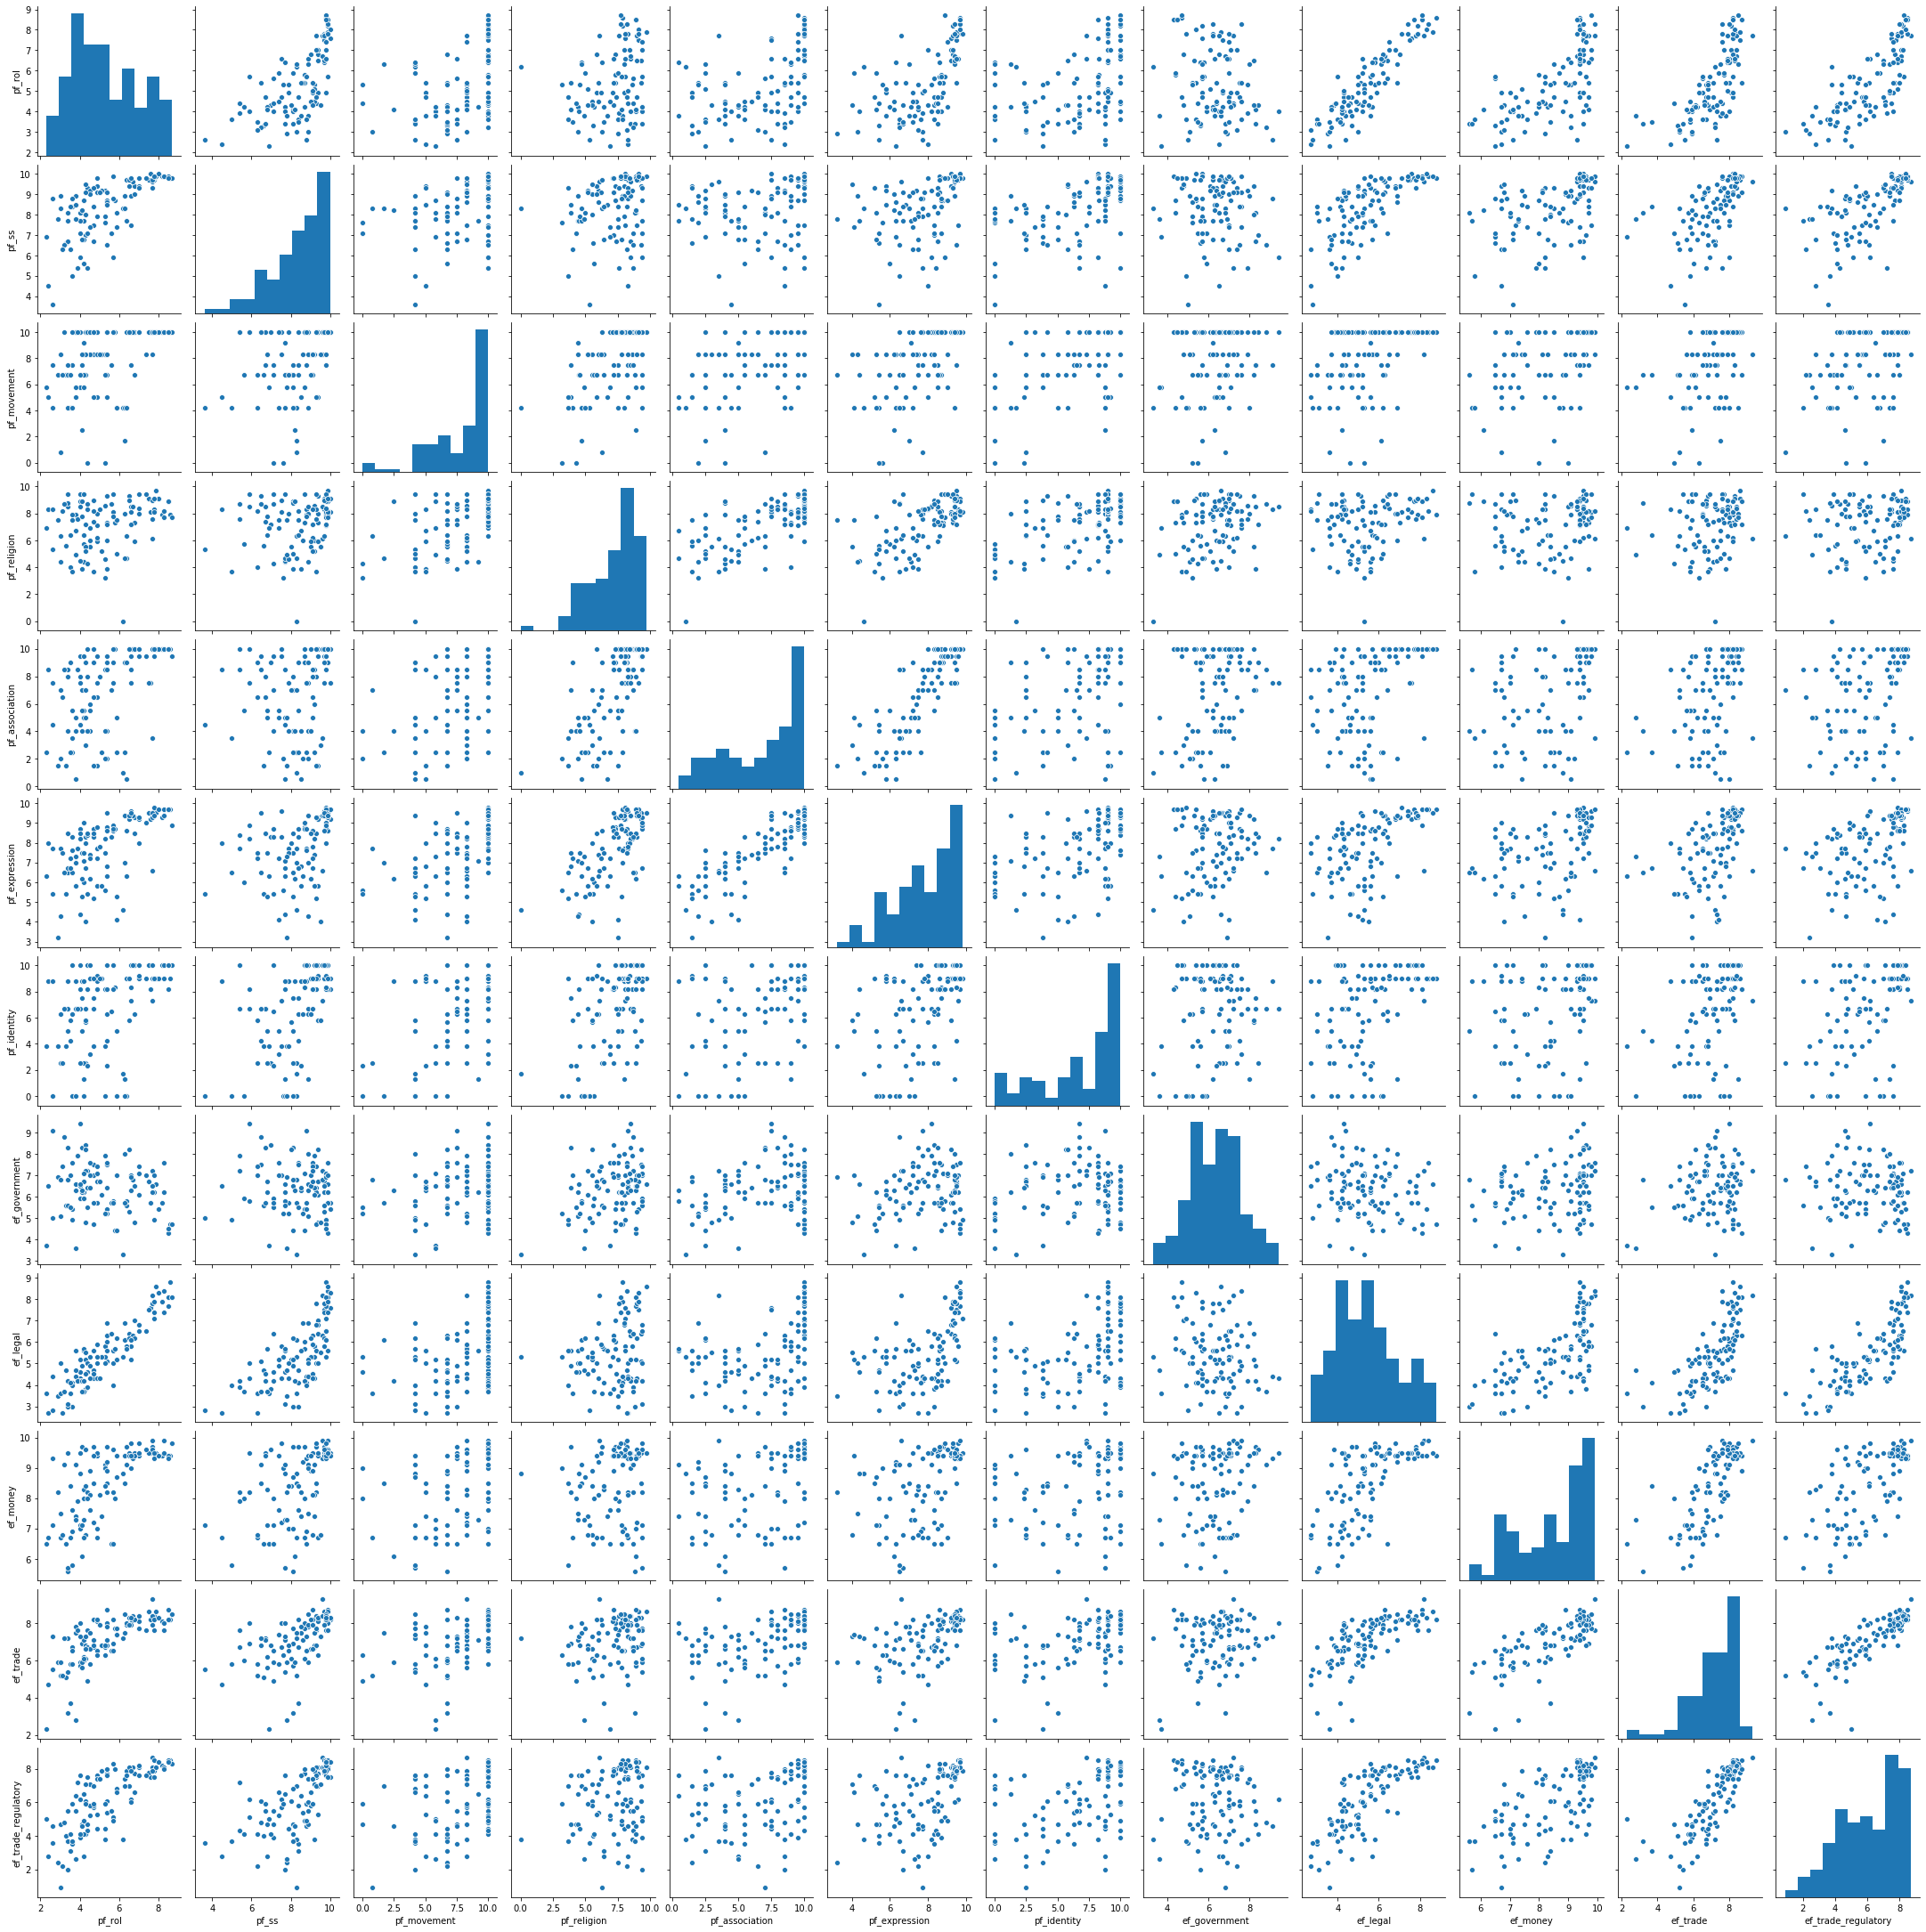

In [78]:
plt.figure(figsize = (20,20))
sns.pairplot(X_train)

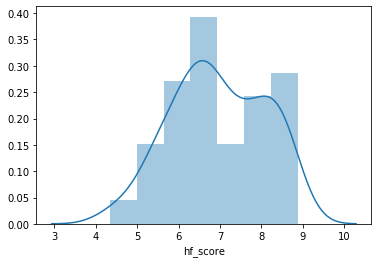

In [80]:
sns.distplot(y_train)

In [66]:

from sklearn.linear_model import LinearRegression
lr = LinearRegression()